# Different data

              precision    recall  f1-score   support

           0       0.27      0.55      0.36        66
           1       0.74      0.46      0.57       184

    accuracy                           0.48       250
   macro avg       0.50      0.50      0.46       250
weighted avg       0.61      0.48      0.51       250



/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


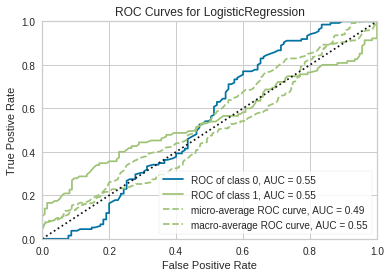

In [2]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC
import matplotlib.pyplot as plt

X_one, y_one = make_gaussian_quantiles(
    mean=[0, 0, 0, 0, 0], cov=1.0, 
    n_samples=1000, 
    n_features=5, 
    n_classes=2, 
    shuffle=True, 
    random_state=0
)

X_two, y_two = make_gaussian_quantiles(
    mean=[1000, 1000, 1000, 1000, 1000], 
    cov=10.0, 
    n_samples=1000, 
    n_features=5, 
    n_classes=2, 
    shuffle=True, 
    random_state=100
)

X_train, X_test, y_train, y_test = train_test_split(
    X_one, y_one, test_size=0.5
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5
)
clf = LogisticRegression(
    C=1e-15, penalty="l2", 
    solver="lbfgs", max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))

visualizer = ROCAUC(clf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       250
           1       0.00      0.00      0.00         0

    accuracy                           0.52       250
   macro avg       0.50      0.26      0.34       250
weighted avg       1.00      0.52      0.68       250



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


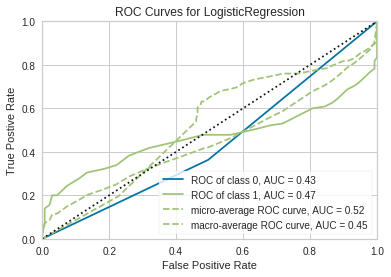

In [4]:
# Retrain
surrogate_clf = LogisticRegression(**clf.get_params())
prod_y_pred = clf.predict(X_two)
prod_y_pred[-1] = 1
surrogate_clf.fit(X_two, prod_y_pred)
y_two_pred = surrogate_clf.predict(X_val)
print(classification_report(y_two_pred, y_val))

visualizer = ROCAUC(surrogate_clf, classes=[0, 1])

visualizer.fit(X_two, prod_y_pred)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()
plt.show()

# Same data

              precision    recall  f1-score   support

           0       0.68      0.55      0.61       154
           1       0.45      0.58      0.51        96

    accuracy                           0.56       250
   macro avg       0.56      0.57      0.56       250
weighted avg       0.59      0.56      0.57       250



/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


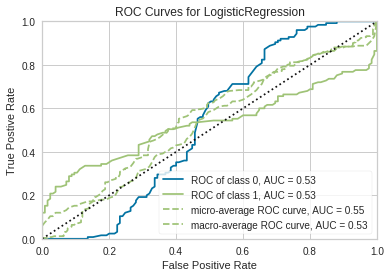

In [5]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_one, y_one = make_gaussian_quantiles(
    mean=[0, 0, 0, 0, 0], cov=1.0, 
    n_samples=1000, 
    n_features=5, 
    n_classes=2, 
    shuffle=True, 
    random_state=0
)

X_two, y_two = make_gaussian_quantiles(
    mean=[0, 0, 0, 0, 0], cov=1.0, 
    n_samples=1000, 
    n_features=5, 
    n_classes=2, 
    shuffle=True, 
    random_state=0
)

X_train, X_test, y_train, y_test = train_test_split(
    X_one, y_one, test_size=0.5
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5
)
clf = LogisticRegression(
    C=1e-15, penalty="l2", 
    solver="lbfgs", max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))

visualizer = ROCAUC(clf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.52      0.60       158
           1       0.43      0.62      0.51        92

    accuracy                           0.56       250
   macro avg       0.56      0.57      0.55       250
weighted avg       0.60      0.56      0.56       250



/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


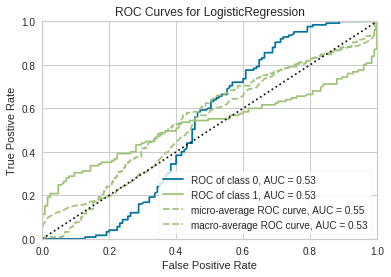

In [6]:
# Retrain
surrogate_clf = LogisticRegression(**clf.get_params())
prod_y_pred = clf.predict(X_two)
prod_y_pred[-1] = 1
surrogate_clf.fit(X_two, prod_y_pred)
y_two_pred = surrogate_clf.predict(X_val)
print(classification_report(y_two_pred, y_val))

visualizer = ROCAUC(surrogate_clf, classes=[0, 1])

visualizer.fit(X_two, prod_y_pred)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()
plt.show()